# 1st and 2nd analysis for BIDS
**first level analysis,second level analysis for preprocessed data from fmriprep**
<div class="altert alert-info"><h4> Information</h4>
    
 <li>Author: DongHui Song</li>
 <li>email:donghuipsy@gmail.com</li>

 <li>Homepage:https://donghui1119.github.io/donghui/</li>

In [22]:
import os
import numpy as np
import nibabel as nb
from nilearn import plotting
import matplotlib.pyplot as plt
from bids.layout import BIDSLayout
from nilearn.reporting import make_glm_report
from nilearn.plotting import plot_design_matrix
from nilearn.glm.first_level import FirstLevelModel
from nilearn.interfaces.bids import save_glm_to_bids
from nilearn.glm.second_level import SecondLevelModel
from nilearn.glm.thresholding import threshold_stats_img
from nilearn.glm.first_level import first_level_from_bids


In [26]:
data_dir="/home/donghui/Public/Tutorials/spm_vs_nilearn_1st_level/vmpfc_bids" # your preprocessed data dir
mask_file="/home/donghui/Public/Tutorials/spm_vs_nilearn_1st_level/codes/rMNI152_T1_2mm_brain_mask.nii" # mask dir

In [27]:
layout = BIDSLayout(data_dir)
subject_list = sorted(layout.get_subjects()) # subject list
n_subject=len(subject_list) # number of  subjects
session_list = layout.get_sessions() # session list
runs = layout.get_runs() # runs list
task_id = sorted(layout.get_tasks()) # task list
# List of functional images
func_files = layout.get(datatype='func', return_type='file', extension='.nii.gz',
                        suffix='bold', task=task_id[0])
resolution = np.array([nb.load(f).header.get_zooms() for f in func_files])
# Get  TR of all collected functional images
TR = np.median(resolution[:, 3])

In [28]:
# Create an empty dictionary
content_func = {}
content_func['number_subjects']=n_subject
# List of subject identifiers
content_func['subject_list_func'] = subject_list
# List of session identifiers
content_func['session_list_func'] = session_list
# List of task identifiers
content_func['task_list'] = task_id
# List of run identifiers
content_func['run_list'] = runs
# Requested isometric voxel resolution
content_func['res_func'] = round(np.median(resolution).astype('float64'), 3)
content_func['tr_func'] = TR
content_func

{'number_subjects': 3,
 'subject_list_func': ['007', '008', '009'],
 'session_list_func': [],
 'task_list': ['emoreg', 'gambling', 'resting', 'social'],
 'run_list': [01, 02],
 'res_func': 2.0,
 'tr_func': 2.0}

In [29]:
task_label = 'social'
space_label = 'MNI152NLin2009cAsym'
derivatives_folder = 'derivatives'
models, models_run_imgs, models_events, models_confounds = \
    first_level_from_bids(
        data_dir, task_label,space_label,
        img_filters=[('desc', 'preproc')],min_onset=-5, \
    smoothing_fwhm=8,hrf_model='spm', signal_scaling=False,mask_img=mask_file,minimize_memory=False)
#drift_model=None

/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:932: UserWarning: SliceTimingRef not found in file /home/donghui/Public/Tutorials/spm_vs_nilearn_1st_level/vmpfc_bids/derivatives/sub-007/func/sub-007_task-social_run-1_space-MNI152NLin2009cAsym_desc-preproc_bold.json. It will be assumed that the slice timing reference is 0.0 percent of the repetition time. If it is not the case it will need to be set manually in the generated list of models
  warn('SliceTimingRef not found in file %s. It will be assumed'


In [31]:
contrast_social='social-random'

/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:688: UserWarning: One contrast given, assuming it for all 2 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/reporting/_get_clusters_table.py:311: UserWarning: Attention: No clusters with stat higher than 3.2905267314918945
  warnings.warn(
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/interfaces/bids/_utils.py:48: UserWarning: Contrast name "social-random" changed to "socialMinusRandom"
  warnings.warn(
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/interfaces/bids/_utils.py:48: UserWarning: Contrast name "social-random" changed to "socialMinusRandom"
  warnings.warn(
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:688: UserWarning: One contrast given, assuming it for all 2 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)


Extracting and saving residuals
Extracting and saving r_square


/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:688: UserWarning: One contrast given, assuming it for all 2 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/interfaces/bids/_utils.py:48: UserWarning: Contrast name "social-random" changed to "socialMinusRandom"
  warnings.warn(
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/interfaces/bids/_utils.py:48: UserWarning: Contrast name "social-random" changed to "socialMinusRandom"
  warnings.warn(
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:688: UserWarning: One contrast given, assuming it for all 2 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/interfaces/bids/_utils.py:48: UserWarning: Contrast name "social-random" changed to "socialMinusRandom"
  warnings.warn(


Extracting and saving residuals
Extracting and saving r_square


/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:688: UserWarning: One contrast given, assuming it for all 2 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/interfaces/bids/_utils.py:48: UserWarning: Contrast name "social-random" changed to "socialMinusRandom"
  warnings.warn(
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/interfaces/bids/_utils.py:48: UserWarning: Contrast name "social-random" changed to "socialMinusRandom"
  warnings.warn(
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:688: UserWarning: One contrast given, assuming it for all 2 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/interfaces/bids/_utils.py:48: UserWarning: Contrast name "social-random" changed to "socialMinusRandom"
  warnings.warn(


Extracting and saving residuals
Extracting and saving r_square


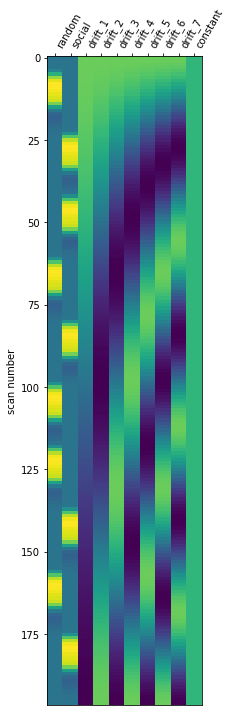

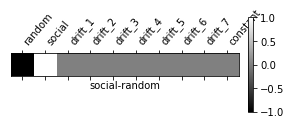

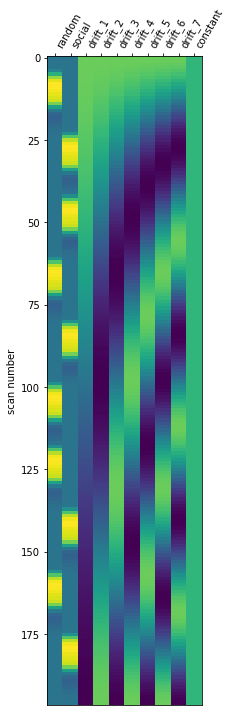

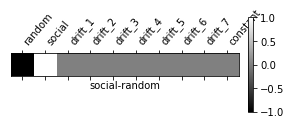

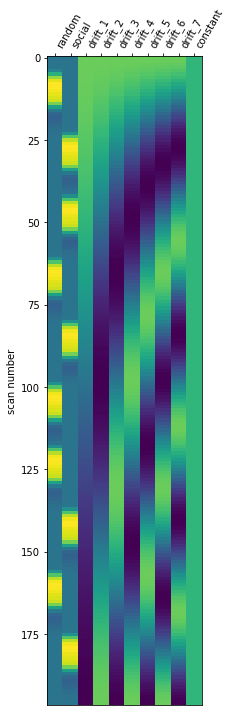

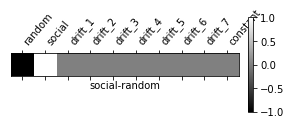

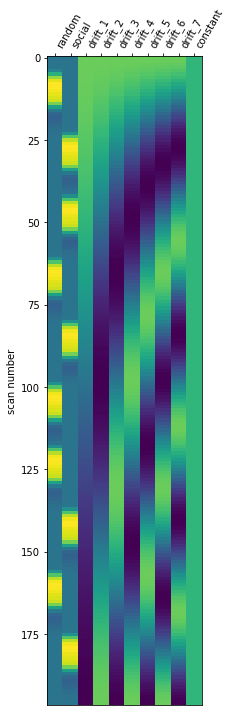

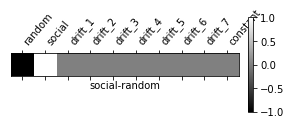

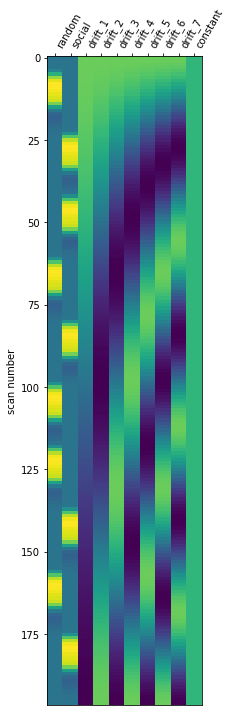

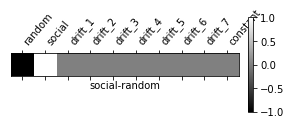

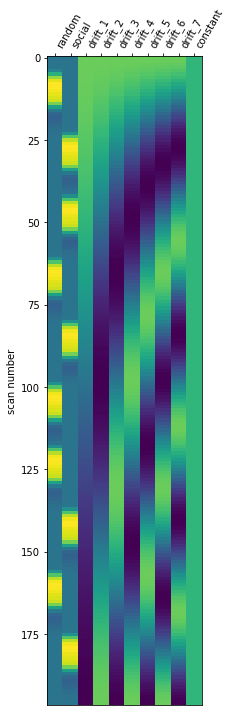

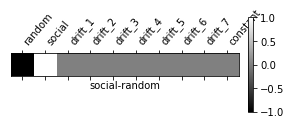

In [33]:
model_and_args = zip(models, models_run_imgs, models_events, models_confounds)
for midx, (model, imgs, events, confounds) in enumerate(model_and_args):
    model.fit(imgs, events)
    report = make_glm_report(
        model,
        contrasts=contrast_social,
    )
    
    results_dirf=data_dir+'/derivatives/nilearn_glm/sub-'+model.subject_label
    if not os.path.exists(results_dirf):
        os.makedirs((results_dirf))
    
    #report # open in notebook
    #report.open_in_browser() #open in browser
    report.save_as_html(results_dirf+'/sub-'+model.subject_label+'_report.html')
    
    save_glm_to_bids(
    model,
    contrasts=contrast_social,
    contrast_types={contrast_social: 't'},
    out_dir=results_dirf+'/',
    prefix=f'sub-' + model.subject_label+'_task-social',
   )
    

In [41]:
# second level analysis
second_level_input = models
second_level_model = SecondLevelModel(smoothing_fwhm=8.0)
second_level_model = second_level_model.fit(second_level_input)

second_level_model.compute_contrast(
    first_level_contrast=contrast_social)

results_dirs=data_dir+'/derivatives/nilearn_glm/second_level'

if not os.path.exists(results_dirs):
    os.makedirs((results_dirs))
    
    
s_stat= second_level_model.compute_contrast(
    first_level_contrast='social-random',output_type='all')  
    

second_Pvalue=results_dirs+'/second_level_P_value.nii.gz'
second_Zscore=results_dirs+'/second_level_Z_score.nii.gz'
second_Stat=results_dirs+'/second_level_Stat_value.nii.gz'
second_effect_size=results_dirs+'/second_level_effect_size.nii.gz'
second_effect_variance=results_dirs+'/second_level_effect_variance.nii.gz'

s_stat['p_value'].to_filename(second_Pvalue)
s_stat['z_score'].to_filename(second_Zscore)
s_stat['stat'].to_filename(second_Stat)
s_stat['effect_size'].to_filename(second_effect_size)
s_stat['effect_variance'].to_filename(second_effect_variance)
    

/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:688: UserWarning: One contrast given, assuming it for all 2 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:688: UserWarning: One contrast given, assuming it for all 2 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:688: UserWarning: One contrast given, assuming it for all 2 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:688: UserWarning: One contrast given, assuming it for all 2 runs
  warn('One contrast given, assuming it for all %d runs' % n_runs)
/home/donghui/anaconda3/lib/python3.9/site-packages/nilearn/glm/first_level/first_level.py:688: UserWarning:

In [ ]:
# second level analysis
second_level_input = models

second_level_model = SecondLevelModel()
second_level_model = second_level_model.fit(second_level_input)

s_stat= second_level_model.compute_contrast(
    first_level_contrast='social-random',output_type='all')

second_Pvalue=results_dirs+'/second_level_P_value.nii.gz'
second_Zscore=results_dirs+'/second_level_Z_score.nii.gz'
second_Stat=results_dirs+'/second_level_Stat_value.nii.gz'
second_effect_size=results_dirs+'/second_level_effect_size.nii.gz'
second_effect_variance=results_dirs+'/second_level_effect_variance.nii.gz'

s_stat['p_value'].to_filename(second_Pvalue)
s_stat['z_score'].to_filename(second_Zscore)
s_stat['stat'].to_filename(second_Stat)
s_stat['effect_size'].to_filename(second_effect_size)
s_stat['effect_variance'].to_filename(second_effect_variance)

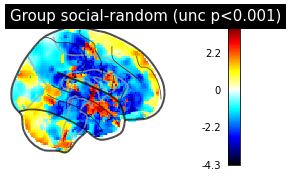

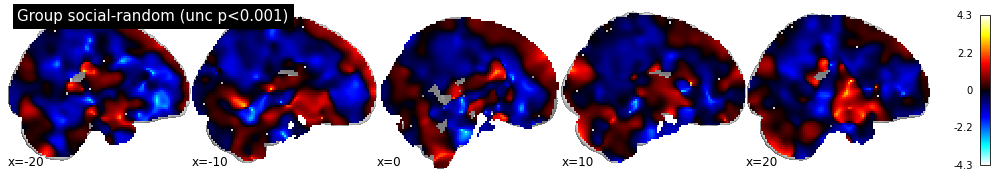

In [45]:
#plotting.plot_glass_brain(s_stat['z_score'], colorbar=True, threshold=0.001,
#                          title='Group social-random (unc p<0.001)',
                          plot_abs=False, display_mode='x')
#plotting.show()

plotting.plot_stat_map(s_stat['z_score'], colorbar=True,threshold=0.001,
                          title='Group social-random (unc p<0.001)',
                           display_mode='x',cut_coords=[-20,-10,0,10,20])
plotting.show()